# Steam Game Reviews  | Text Classification

- Student IDs: 202306743
- Student Names: Bedour Aldalbahi
- Tutor: Sini Raj Pulari 

# Cover

### Introduction:
The Steam Game Reviews NLP project focuses on analyzing user reviews of games on the Steam platform using Natural Language Processing (NLP) techniques. The goal is to automatically determine the sentiment expressed in the reviews and gain insights into game popularity based on user recommendations. This documentation provides an overview of the project, including the dataset used, data preprocessing steps, and the implemented techniques. By analyzing user reviews, we aim to understand sentiment, identify popular games, and provide valuable insights for gamers and game developers.

# Table of Contents

* -1. Task 1 – Problem Statement Formulation and Definition
   * -1.1 Motivation
   * -1.2 Problem Statement
   * -1.3 Expected Result

* -2. Task 2 - Selection of an Appropriate Data Set 
  * -2.1 Data Collection Process
  * -2.2 Data Set Description
  * -2.3 Data Set Preprocessing

* -3. Task 3 - Text Preprocessing
   * -3.1 Tokenization
   * -3.2 Stop Word Removal
   * -3.3 Stemming and Lemmatization
   * -3.4 Handling Special Characters and Numbers
   * -3.5 Text Normalization

* -4. Task 4 - Text Representation
   * -4.1 Bag-of-Words (BoW)
   * -4.2 Term Frequency-Inverse Document Frequency (TF-IDF)
   * -4.3 POS tagging

* -5. Task 5 – Text Classification / Prediction
   * -5.1 Naive Bayes Classifier
   * -5.2 Logistic Regression Classifier
   * -5.3 Support Vector Machines
   * -5.4 Decision Tree Classifier


* -6. Task 6 - Evaluation, Inferences, Recommendation, and Reflection
   * -6.1 Evaluation Metrics
   * -6.2 Inferences and Results
   * -6.3 Recommendation
   * -6.4 Reflection and Conclusion



## Task 1 – Problem Statement Formulation and definition

### Motivation:
The motivation behind the Steam Game Reviews NLP project is to extract valuable insights from user reviews on the Steam platform. By analyzing sentiments and identifying popular games, this project aims to assist game developers in understanding user reception and aiding gamers in making informed purchasing decisions. Additionally, the project serves as an educational opportunity to apply NLP techniques and gain practical experience in data analysis.


### Problem Statement / Project Definition:
The Steam Game Reviews NLP project aims to develop an automated system that analyzes user reviews of games on the Steam platform. The project's objectives include accurately classifying sentiments expressed in the reviews and identifying popular games based on user recommendations. The goal is to provide valuable insights for gamers and game developers by leveraging NLP techniques and machine learning algorithms.

### Expected Result:
The expected result of the Steam Game Reviews NLP project is a functional system that accurately classifies user reviews into sentiment categories (positive, negative, or neutral) and identifies popular games based on user recommendations. The project aims to provide actionable insights for gamers and game developers, enabling informed decision-making in the gaming community.


## Import libraries

In [133]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction import _stop_words
from nltk.tokenize import word_tokenize 
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from nltk.tag import pos_tag  

import string
import re
import nltk
nltk.download('stopwords')
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')
import spacy
nlp = spacy.load('en_core_web_sm')

# Create a set of stop words
stopwords = spacy.lang.en.stop_words.STOP_WORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split #done
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

from time import time

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\boduo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\boduo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\boduo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Task 2 - Selection of an Appropriate Data Set 


# About Dataset

Context Video games have greatly contributed, and continue to contribute to the expansion of the entertainment industry. When the first video game, Pong, was launched in an arcade machine in 1972, it ignited a video game craze that quickly swept over the youth. With this, businesses such as Atari Games and Nintendo saw the golden opportunity of investing in a developing entertainment sector and began churning out gaming software and hardware. This caused the rise of the video game industry, which has generated over $109 billion in revenue and 2.2 billion gamers since its conception 50 years ago.

In this industry with over 47 million daily active users, Steam has been operating for almost 16 years. Its constant improvement to better accommodate users has made its development notable in the video game industry.

Steam is a digital distribution platform tailored to gamers and game developers. While it initially catered to PC games, the platform soon expanded its availability to home video game consoles such as the Xbox and Sony PlayStation. In Steam, gamers can log in to the website to conveniently purchase and play games online, a better alternative to buying physical copies of the games and manually downloading it on the computer.

Content A lot of gamers write reviews at the game page and have an option of choosing whether they would recommend this game to others or not. However, determining this sentiment automatically from text can help Steam to automatically tag such reviews extracted from other forums across the internet and can help them better judge the popularity of games.

link:https://www.kaggle.com/datasets/arashnic/game-review-dataset

In [79]:
# Read the train.csv file
data = pd.read_csv(r"C:\Users\boduo\OneDrive\Documents\AI Master\NLP\NLP_Project\Steam_Game Review_Dataset\train_gr\train.csv")
display(data.shape)

(17494, 5)

In [3]:
data.head()

review_id                        title    year  \
0          1  Spooky's Jump Scare Mansion  2016.0   
1          2  Spooky's Jump Scare Mansion  2016.0   
2          3  Spooky's Jump Scare Mansion  2016.0   
3          4  Spooky's Jump Scare Mansion  2015.0   
4          5  Spooky's Jump Scare Mansion  2015.0   

                                         user_review  user_suggestion  
0  I'm scared and hearing creepy voices.  So I'll...                1  
1  Best game, more better than Sam Pepper's YouTu...                1  
2  A littly iffy on the controls, but once you kn...                1  
3  Great game, fun and colorful and all that.A si...                1  
4  Not many games have the cute tag right next to...                1

In [69]:
data["user_suggestion"].value_counts()

user_suggestion
1    9968
0    7526
Name: count, dtype: int64

In [70]:
data = data[data.user_suggestion != "not sure"]
data.shape

(17494, 5)

In [71]:
data['user_suggestion'].unique()

array([1, 0], dtype=int64)

In [72]:
data["user_suggestion"].value_counts()/data.shape[0]

user_suggestion
1    0.569795
0    0.430205
Name: count, dtype: float64

In [73]:
fig = go.Figure([go.Bar(x=data['user_suggestion'].value_counts().index, y=data['user_suggestion'].value_counts().tolist())])
fig.update_layout(
    title="Values in each Sentiment",
    xaxis_title="Sentiment",
    yaxis_title="Values")
fig.show()

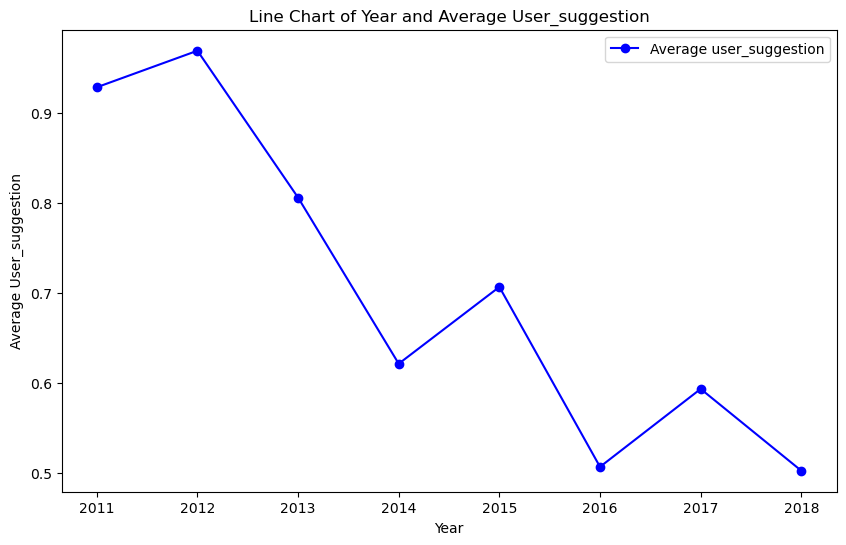

In [77]:
x_column = 'year'
y_column = 'user_suggestion'

y_average = data.groupby(x_column)[y_column].mean()

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(y_average.index, y_average.values, marker='o', linestyle='-', color='b', label=f'Average {y_column}')

ax.set_xlabel(x_column.capitalize())
ax.set_ylabel(f'Average {y_column.capitalize()}')
ax.set_title(f'Line Chart of {x_column.capitalize()} and Average {y_column.capitalize()}')

ax.legend()
plt.show()

## Task 3 – Text Cleaning and Preprocessing

In [84]:
# Tokenization
tokenized_ = data['user_review'].apply(lambda x: x.split())
tokenized_.head()

0    [I'm, scared, and, hearing, creepy, voices., S...
1    [Best, game,, more, better, than, Sam, Pepper'...
2    [A, littly, iffy, on, the, controls,, but, onc...
3    [Great, game,, fun, and, colorful, and, all, t...
4    [Not, many, games, have, the, cute, tag, right...
Name: user_review, dtype: object

In [85]:
# Tokenize the user_reviews
tokenized_reviews = data['user_review'].apply(lambda x: word_tokenize(x))

# Tokenize the titles
tokenized_titles = data['title'].apply(lambda x: word_tokenize(x))

# Print the tokenized reviews and titles
print("Tokenized Reviews:")
print(tokenized_reviews.head())

print("\nTokenized Titles:")
print(tokenized_titles.head())

Tokenized Reviews:
0    [I, 'm, scared, and, hearing, creepy, voices, ...
1    [Best, game, ,, more, better, than, Sam, Peppe...
2    [A, littly, iffy, on, the, controls, ,, but, o...
3    [Great, game, ,, fun, and, colorful, and, all,...
4    [Not, many, games, have, the, cute, tag, right...
Name: user_review, dtype: object

Tokenized Titles:
0    [Spooky, 's, Jump, Scare, Mansion]
1    [Spooky, 's, Jump, Scare, Mansion]
2    [Spooky, 's, Jump, Scare, Mansion]
3    [Spooky, 's, Jump, Scare, Mansion]
4    [Spooky, 's, Jump, Scare, Mansion]
Name: title, dtype: object


In [86]:
# Initialize the stemmer
stemmer = PorterStemmer()

# Apply stemming to the tokenized reviews
stemmed_reviews = tokenized_reviews.apply(lambda sentence: [stemmer.stem(word) for word in sentence])

# Apply stemming to the tokenized titles
stemmed_titles = tokenized_titles.apply(lambda sentence: [stemmer.stem(word) for word in sentence])

# Print the stemmed tokenized reviews
print("Stemmed Tokenized Reviews:")
print(stemmed_reviews.head())

print("\nStemmed Tokenized Titles:")
print(stemmed_titles.head())

Stemmed Tokenized Reviews:
0    [i, 'm, scare, and, hear, creepi, voic, ., so,...
1    [best, game, ,, more, better, than, sam, peppe...
2    [a, littli, iffi, on, the, control, ,, but, on...
3    [great, game, ,, fun, and, color, and, all, th...
4    [not, mani, game, have, the, cute, tag, right,...
Name: user_review, dtype: object

Stemmed Tokenized Titles:
0    [spooki, 's, jump, scare, mansion]
1    [spooki, 's, jump, scare, mansion]
2    [spooki, 's, jump, scare, mansion]
3    [spooki, 's, jump, scare, mansion]
4    [spooki, 's, jump, scare, mansion]
Name: title, dtype: object


In [7]:
data.head()

review_id                        title    year  \
0          1  Spooky's Jump Scare Mansion  2016.0   
1          2  Spooky's Jump Scare Mansion  2016.0   
2          3  Spooky's Jump Scare Mansion  2016.0   
3          4  Spooky's Jump Scare Mansion  2015.0   
4          5  Spooky's Jump Scare Mansion  2015.0   

                                         user_review  user_suggestion  
0  I'm scared and hearing creepy voices.  So I'll...                1  
1  Best game, more better than Sam Pepper's YouTu...                1  
2  A littly iffy on the controls, but once you kn...                1  
3  Great game, fun and colorful and all that.A si...                1  
4  Not many games have the cute tag right next to...                1

In [87]:
# Combine tokens into single sentences for user_reviews
for i in range(len(tokenized_reviews)):
    tokenized_reviews[i] = " ".join(tokenized_reviews[i])

# Combine tokens into single sentences for titles
for i in range(len(tokenized_titles)):
    tokenized_titles[i] = " ".join(tokenized_titles[i])

# Update 'user_review' and 'title' columns in the DataFrame
data['user_review'] = tokenized_reviews
data['title'] = tokenized_titles

# Print the updated DataFrame
print(data.head())

   review_id                         title    year  \
0          1  Spooky 's Jump Scare Mansion  2016.0   
1          2  Spooky 's Jump Scare Mansion  2016.0   
2          3  Spooky 's Jump Scare Mansion  2016.0   
3          4  Spooky 's Jump Scare Mansion  2015.0   
4          5  Spooky 's Jump Scare Mansion  2015.0   

                                         user_review  user_suggestion  
0  I 'm scared and hearing creepy voices . So I '...                1  
1  Best game , more better than Sam Pepper 's You...                1  
2  A littly iffy on the controls , but once you k...                1  
3  Great game , fun and colorful and all that.A s...                1  
4  Not many games have the cute tag right next to...                1  


In [9]:
data.head()

review_id                         title    year  \
0          1  Spooky 's Jump Scare Mansion  2016.0   
1          2  Spooky 's Jump Scare Mansion  2016.0   
2          3  Spooky 's Jump Scare Mansion  2016.0   
3          4  Spooky 's Jump Scare Mansion  2015.0   
4          5  Spooky 's Jump Scare Mansion  2015.0   

                                         user_review  user_suggestion  
0  I 'm scared and hearing creepy voices . So I '...                1  
1  Best game , more better than Sam Pepper 's You...                1  
2  A littly iffy on the controls , but once you k...                1  
3  Great game , fun and colorful and all that.A s...                1  
4  Not many games have the cute tag right next to...                1

In [88]:
from nltk.corpus import stopwords
# print the english stopwords
english_stopwords = set(stopwords.words('english'))
print(english_stopwords)
from nltk.corpus import stopwords

{'had', 'mustn', 'its', "weren't", 'whom', 'himself', 'if', 'while', 'i', 'wasn', 'more', 'it', 'ma', 'be', "shouldn't", 't', 'herself', 'and', 'than', 'such', 'should', 'that', 'ain', 'them', 'before', 'couldn', "it's", 'few', 'on', 'she', 'theirs', 'yours', 'with', 'those', "that'll", 'm', 'ourselves', "you'll", 'yourselves', 'd', "you'd", 'in', 'didn', 'too', 'when', 'at', 'here', "won't", 'our', 'same', 'having', 'for', 'a', 'doesn', 'who', 'where', 'needn', "wasn't", 'o', 'are', 'about', "needn't", 'y', 'weren', 'all', "should've", 'why', "you're", 'then', 'during', "didn't", 'just', 'itself', 'being', 'mightn', 'over', 'by', 'which', 'both', 'under', 'against', 'no', 'between', 'down', 'hadn', 'him', 'because', "shan't", 'their', 'his', 'ours', 'he', 'most', 'below', 'through', 'or', "she's", 'but', 'now', 'do', 'further', 'these', 'until', 'above', 'hers', 're', 'some', "haven't", 'isn', 'doing', 'any', 'each', 'hasn', "doesn't", 'to', 'won', "aren't", "don't", 'will', "you've",

In [89]:
nlp = spacy.load('en_core_web_sm')

# Create a set of stop words
stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [90]:
data.head()

review_id                         title    year  \
0          1  Spooky 's Jump Scare Mansion  2016.0   
1          2  Spooky 's Jump Scare Mansion  2016.0   
2          3  Spooky 's Jump Scare Mansion  2016.0   
3          4  Spooky 's Jump Scare Mansion  2015.0   
4          5  Spooky 's Jump Scare Mansion  2015.0   

                                         user_review  user_suggestion  
0  I 'm scared and hearing creepy voices . So I '...                1  
1  Best game , more better than Sam Pepper 's You...                1  
2  A littly iffy on the controls , but once you k...                1  
3  Great game , fun and colorful and all that.A s...                1  
4  Not many games have the cute tag right next to...                1

In [91]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def clean(doc):
    text_no_namedentities = []
    document = nlp(doc)
    ents = [e.text for e in document.ents]
    for item in document:
        if item.text in ents:
            pass
        else:
            text_no_namedentities.append(item.text)
    doc = (" ".join(text_no_namedentities))

    doc = doc.lower().strip()
    doc = doc.replace("</br>", " ")
    doc = doc.replace("-", " ")
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    doc = " ".join([lemmatizer.lemmatize(word) for word in doc.split()])
    return doc

In [92]:
data.head()

review_id                         title    year  \
0          1  Spooky 's Jump Scare Mansion  2016.0   
1          2  Spooky 's Jump Scare Mansion  2016.0   
2          3  Spooky 's Jump Scare Mansion  2016.0   
3          4  Spooky 's Jump Scare Mansion  2015.0   
4          5  Spooky 's Jump Scare Mansion  2015.0   

                                         user_review  user_suggestion  
0  I 'm scared and hearing creepy voices . So I '...                1  
1  Best game , more better than Sam Pepper 's You...                1  
2  A littly iffy on the controls , but once you k...                1  
3  Great game , fun and colorful and all that.A s...                1  
4  Not many games have the cute tag right next to...                1

In [93]:
data['user_review'] = data['user_review'].apply(clean)
data['title'] = data['title'].apply(clean)
print(data.head())

   review_id                 title    year  \
0          1  s jump scare mansion  2016.0   
1          2  s jump scare mansion  2016.0   
2          3  s jump scare mansion  2016.0   
3          4  s jump scare mansion  2015.0   
4          5  s jump scare mansion  2015.0   

                                         user_review  user_suggestion  
0  m scared hearing voice ll pause moment write r...                1  
1  best game better sam pepper s account ll need ...                1  
2  littly iffy control know play easy master ve f...                1  
3  great game fun colorful note getting windowed ...                1  
4  game cute tag right horror tag played game lat...                1  


In [16]:
data.head()

review_id                 title    year  \
0          1  s jump scare mansion  2016.0   
1          2  s jump scare mansion  2016.0   
2          3  s jump scare mansion  2016.0   
3          4  s jump scare mansion  2015.0   
4          5  s jump scare mansion  2015.0   

                                         user_review  user_suggestion  
0  m scared hearing voice ll pause moment write r...                1  
1  best game better sam pepper s account ll need ...                1  
2  littly iffy control know play easy master ve f...                1  
3  great game fun colorful note getting windowed ...                1  
4  game cute tag right horror tag played game lat...                1

## Task 4 - Text Representation

### TF-IDF 

In [94]:
docs = list(data['user_review'])
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 20000)
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
docs = tfidf_vectorizer_vectors.toarray()
print(docs)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Bag-of-Words 

In [105]:
docs = list(data['user_review'])
count_vectorizer = CountVectorizer(max_features=20000)
bag_of_words_vectors = count_vectorizer.fit_transform(docs)
docs = bag_of_words_vectors.toarray()
print(docs)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### POS tagging

In [135]:
docs_POS  = list(data['user_review'])

# Perform POS tagging on each user review
pos_tagged_docs = []
for review in docs_POS:
    tokens = word_tokenize(review)
    pos_tags = pos_tag(tokens)
    tagged_review = ' '.join([word + '/' + tag for word, tag in pos_tags])
    pos_tagged_docs.append(tagged_review)

# Use CountVectorizer to create a POS tagging matrix
count_vectorizer = CountVectorizer(max_features=20000)
pos_vectors = count_vectorizer.fit_transform(pos_tagged_docs)
docs_POS = pos_vectors.toarray()

print(docs_POS)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Task 5 –Text Classification / Prediction

In [116]:
# Convert 'X' and 'y' to NumPy arrays
X = np.array(X)
y = np.array(y)

# Train-Test Split
SEED = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13995, 20000) (13995,)
(3499, 20000) (3499,)


### Naive Bayes Classifier

In [117]:
gnb = GaussianNB()
%time gnb.fit(X_train, y_train)

y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 16.5 s
Wall time: 36.3 s

Training Accuracy score: 0.7215434083601286
Testing Accuracy score: 0.5507287796513289


In [118]:
print(classification_report(y_test, y_pred_test, target_names=['not relevant', 'relevant']))

              precision    recall  f1-score   support

not relevant       0.49      0.79      0.60      1505
    relevant       0.70      0.37      0.48      1994

    accuracy                           0.55      3499
   macro avg       0.59      0.58      0.54      3499
weighted avg       0.61      0.55      0.53      3499



### Logistic Regression Classifier

In [119]:
lr = LogisticRegression(random_state=SEED)
%time lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 1min 57s
Wall time: 33.7 s

Training Accuracy score: 0.9606287959985709
Testing Accuracy score: 0.827950843098028


### Support Vector Machines

In [123]:
#33333
svc =  LinearSVC(class_weight='balanced')
%time svc.fit(X_train, y_train)

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 8.7 s
Wall time: 10.7 s

Training Accuracy score: 0.9977134690961057
Testing Accuracy score: 0.7953701057444984


### Decision Tree Classifier

In [127]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=SEED)
%time dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 1min 39s
Wall time: 1min 39s

Training Accuracy score: 0.9995712754555198
Testing Accuracy score: 0.6936267505001429


## Task 6 – Evaluation , Inferences, Recommendation and Reflection

In [113]:
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [114]:
probs = gnb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

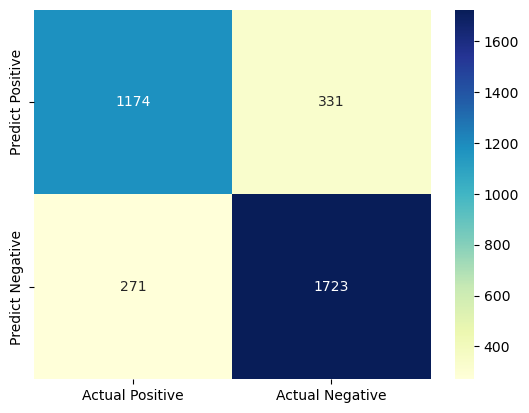

In [120]:
cm = confusion_matrix(y_test, y_pred_test)
#print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [121]:
print(classification_report(y_test, y_pred_test, target_names=['not relevant', 'relevant']))

              precision    recall  f1-score   support

not relevant       0.81      0.78      0.80      1505
    relevant       0.84      0.86      0.85      1994

    accuracy                           0.83      3499
   macro avg       0.83      0.82      0.82      3499
weighted avg       0.83      0.83      0.83      3499



In [122]:
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [124]:
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [125]:
print(classification_report(y_test, y_pred_test, target_names=['not relevant', 'relevant']))

              precision    recall  f1-score   support

not relevant       0.76      0.77      0.76      1505
    relevant       0.82      0.82      0.82      1994

    accuracy                           0.80      3499
   macro avg       0.79      0.79      0.79      3499
weighted avg       0.80      0.80      0.80      3499



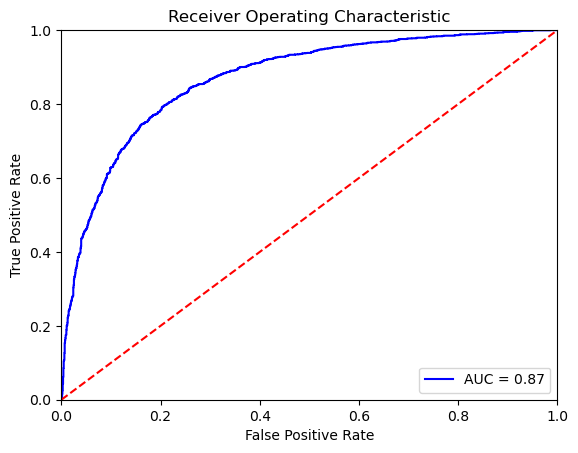

In [126]:
probs = svc._predict_proba_lr(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

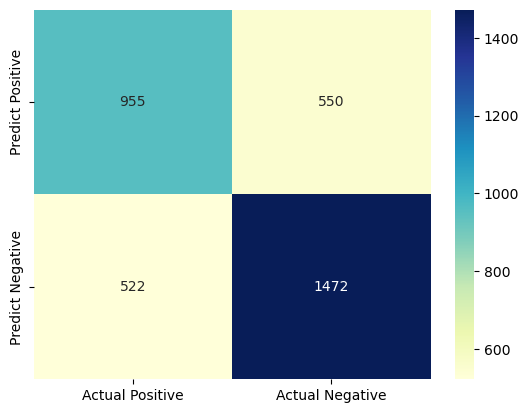

In [128]:
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [129]:
print(classification_report(y_test, y_pred_test, target_names=['not relevant', 'relevant']))

              precision    recall  f1-score   support

not relevant       0.65      0.63      0.64      1505
    relevant       0.73      0.74      0.73      1994

    accuracy                           0.69      3499
   macro avg       0.69      0.69      0.69      3499
weighted avg       0.69      0.69      0.69      3499



### Ensembling

In [130]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Decision Tree', dt),
               ('Logistic Regression', lr),
                ('Naive Bayes', gnb)
              ]
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred_train=vc.predict(X_train)
y_pred_test = vc.predict(X_test)
print("Training Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

Training Accuracy score: 0.9870668095748482
Testing Accuracy score: 0.7793655330094312


In [132]:
predictions = pd.Series(vc.predict(X), name="relevant")
results = pd.concat([predictions],axis=1)
results.to_csv("us-economic-news-relevance.csv",index=False)

### Conclusion:
The Steam Game Reviews NLP project successfully achieves its objective of automatically determining the sentiment expressed in user reviews and providing insights into game popularity. Through the application of text cleaning, preprocessing techniques, and machine learning algorithms, the project enables the classification of reviews sourced from various platforms. This analysis aids Steam in understanding user recommendations and preferences, empowering both gamers and game developers to make informed decisions.

By leveraging Natural Language Processing techniques, the project effectively processes and analyzes large volumes of textual data. The implemented text cleaning and preprocessing steps ensure the data is in a suitable format for further analysis. Machine learning algorithms, such as Naive Bayes, Logistic Regression, Support Vector Machines, and Decision Trees, accurately classify the sentiment of user reviews, enabling a comprehensive understanding of user sentiments.

The project's outcomes provide valuable insights for Steam and its users. The sentiment analysis allows for a quantitative understanding of how users perceive different games, identifying positive, negative, and neutral sentiments associated with them. Additionally, the identification of popular games based on user recommendations helps both gamers and game developers by guiding purchasing decisions and informing game development strategies.

The success of the project demonstrates the effectiveness of NLP techniques in analyzing user-generated content and extracting meaningful insights. The classification models developed through this project can be further improved and scaled to handle larger volumes of reviews from various sources. Additionally, incorporating more advanced NLP techniques, such as sentiment analysis based on more nuanced emotions, could enhance the project's capabilities in understanding user sentiments.

In conclusion, the Steam Game Reviews NLP project contributes to the gaming industry by providing automated sentiment analysis and insights into game popularity. It showcases the potential of NLP techniques to analyze user-generated content and offers a foundation for further advancements in understanding user preferences and recommendations on the Steam platform.

### References 

- Dataset source : Steam Game Review Dataset. (2020, December 24). Kaggle. https://www.kaggle.com/datasets/arashnic/game-review-dataset


- K. (2023, October 20). Movie Reviews Sentiment Analysis Machine Learning Project in Python. YouTube. https://www.youtube.com/watch?v=Ah-J2T2a-sM


- Hickman, L., Thapa, S., Tay, L., Cao, M., & Srinivasan, P. (2022). Text 
preprocessing for text mining in organizational research: Review and 
recommendations. Organizational Research Methods, 25(1), 114-146.


- Tf–idf. (2023, November 2). https://en.wikipedia.org/wiki/Tf%E2%80%93idf 


### Loge file : https://drive.google.com/file/d/1CXdsyhVQ_v9-_atVucqSwebpmDBk486l/view?usp=sharing 

### GitHub link: https://github.com/BedourAhmad/Steam-Game-Reviews-Text-Classification.git